In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def import_dataset_from_file(path_to_file: str) -> pd.DataFrame:
    """
    Функция импортирования исходных данных.
    :param path_to_file: путь к загружаемому файлу;
    :return: структура данных.
    """
    dataset = pd.read_table(path_to_file, delim_whitespace=True, names=['x', 'y', 'z'])

    return dataset

In [ ]:
import io
from pathlib import Path

import numpy as np
import pandas as pd


def import_dataset_from_file(path_to_file: str) -> pd.DataFrame:
    """
    Функция импортирования исходных данных.
    :param path_to_file: путь к загружаемому файлу;
    :return: структура данных.
    """
    dataset = pd.read_table(path_to_file, delim_whitespace=True, names=['x', 'y', 'z'])

    return dataset


def calculate_norm(control_data: pd.DataFrame, team_attempt_data: pd.DataFrame) -> float:
    """
    Функция расчета нормы расчитанного решения.
    :param control_data: контрольная выборка;
    :param team_attempt_data: посчитанная выборка.
    """
    control_dataset = np.array(control_data.z)
    team_dataset = np.array(team_attempt_data.z)
    N = control_dataset.size
    norm = np.sqrt(1 / N * np.sum((control_dataset - team_dataset) ** 2))

    return float(norm)



In [3]:
# Вспомогательные данные, по которым производится моделирование
map_1_dataset = import_dataset_from_file("..\\Data\\Map_1.txt")
map_2_dataset = import_dataset_from_file("..\\Data\\Map_2.txt")
map_3_dataset = import_dataset_from_file("..\\Data\\Map_3.txt")
map_4_dataset = import_dataset_from_file("..\\Data\\Map_4.txt")
map_5_dataset = import_dataset_from_file("..\\Data\\Map_5.txt")

# Данные, по которым необходимо смоделировать
point_dataset = import_dataset_from_file("..\\Data\\Point_dataset.txt")

# Точки данных, в которые необходимо провести моделирование (сетка данных)
point_grid = import_dataset_from_file("..\\Data\\Result_schedule.txt")

In [4]:
from scipy.interpolate import NearestNDInterpolator

In [237]:
Z_maps = []
map_list = [map_1_dataset, map_2_dataset, map_3_dataset, map_4_dataset, map_5_dataset]
for i in range(5):
    interp = NearestNDInterpolator(list(zip(map_list[i].x, map_list[i].y)), map_list[i].z)
    Z_maps.append(interp(point_dataset.x, point_dataset.y))

In [238]:
Z_input = list(zip(Z_maps[0], Z_maps[1], Z_maps[2], Z_maps[3], Z_maps[4]))
Y_input = list(point_dataset.z)

In [239]:
Z_input

[(0.17579, 0.12807, 41.38491, 4045.6523, 1.68053),
 (0.14988, 0.1187, 36.2735, 4199.0898, 1.67999),
 (0.17143, 0.13134, 41.7069, 4072.437, 1.68073),
 (0.13929, 0.13193, 37.22216, 4280.4648, 1.68286),
 (0.14322, 0.11874, 37.39187, 4195.1157, 1.6788),
 (0.15157, 0.11369, 40.86293, 4159.6968, 1.68642),
 (0.1624, 0.13549, 35.59994, 4182.4351, 1.67066),
 (0.15058, 0.12066, 40.09259, 4201.0439, 1.67995),
 (0.16793, 0.14259, 37.26351, 4201.9253, 1.66918),
 (0.1527, 0.12473, 37.45739, 4176.8882, 1.67741),
 (0.15785, 0.13283, 40.53269, 4127.1763, 1.67701),
 (0.18014, 0.11751, 42.0512, 4047.1201, 1.67955),
 (0.17857, 0.114, 41.10765, 4044.01, 1.6825),
 (0.18871, 0.11439, 41.93925, 3987.0916, 1.68178),
 (0.17934, 0.11798, 41.74808, 4034.8623, 1.67634),
 (0.18067, 0.11517, 40.20544, 4017.8252, 1.67714),
 (0.17696, 0.11858, 40.954, 4038.366, 1.67711),
 (0.18411, 0.11743, 42.03081, 3998.8894, 1.67851),
 (0.19026, 0.11653, 41.74262, 3998.6602, 1.67705),
 (0.16248, 0.11642, 41.82247, 4156.1152, 1.6840

In [240]:
Y_input

[14.97439625,
 14.07886825,
 14.26157036,
 15.347562,
 14.42256967,
 15.99689205,
 7.926757778,
 12.76980343,
 7.384618042,
 12.14286088,
 12.83758137,
 14.62184589,
 16.94270003,
 15.86125113,
 15.07666326,
 15.19080243,
 15.26402046,
 16.72155266,
 14.8466988,
 17.14758129,
 15.30648368,
 13.83230655,
 15.14459273,
 15.68177223,
 17.24781322,
 12.40815318,
 13.38964769,
 15.81905055,
 11.23985983,
 14.20033129,
 16.26403799,
 17.20962189,
 17.2816197,
 17.00796916,
 10.8899675,
 12.45907851,
 17.68738795,
 11.85328744,
 11.36912962,
 11.30711857,
 11.82403471,
 9.589850183,
 11.07432869,
 8.972242393,
 10.78503952,
 10.03428288,
 10.28007861,
 10.49990313,
 13.00172973,
 8.480841149,
 9.244360451,
 9.916622152,
 11.01881688,
 12.8536538,
 12.46343934,
 7.668958584,
 7.072109394,
 12.03544047,
 8.997155974,
 11.25651795,
 11.8768775,
 11.51708856,
 8.470406313,
 13.89904561,
 16.55209551,
 13.38688677,
 17.87298178,
 10.13241336,
 8.700054978,
 15.87281611,
 10.71539994,
 15.82788731,

Text(0.5, 1.0, '0')

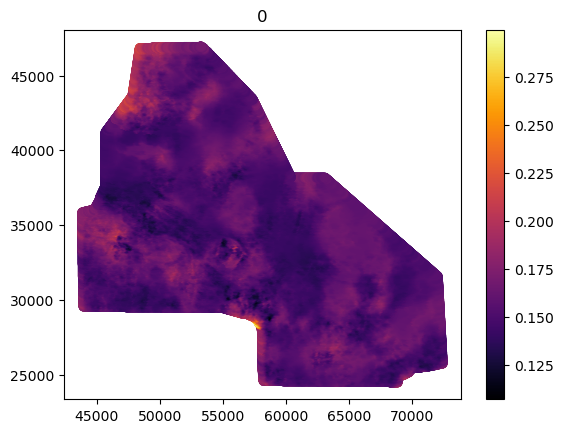

In [241]:
i=0
plt.scatter(map_list[i].x, map_list[i].y, c=map_list[i].z, cmap='inferno')
plt.colorbar()
plt.title(i)

### вычислим точки на картах map[i] в которых, в отличие от других map[j], нету значений. То есть недостающие точки

In [65]:
#выводим сколько точек в каждом листе и в результирующей сетке
([len(map_list[i]) for i in range(5)], len(point_grid))

([1196495, 1196495, 1197106, 1197106, 1196495], 1196590)

In [106]:
int_01 = pd.merge(map_list[0], map_list[1], how='inner', on=['x', 'y'])[['x','y']]
ew_01 = map_list[0][['x','y']].isin(int_01)
ew_01 == [True,True]
len(ew_01[(ew_01['x'] ==False) & (ew_01['y'] ==False)])

0

In [110]:
int_02 = pd.merge(map_list[0], map_list[2], how='inner', on=['x', 'y'])[['x','y']]
ew_02 = map_list[0][['x','y']].isin(int_02) # если в ячейке false, false, значит элемент содержится в map[0], но не содержится в inner, значит этот элемент ТОЛЬКО в map[0]
#количество несовпадающих элементов между пересечением 0ого и 2ого мапа, и 2ым мапом
len(ew_02[(ew_02['x'] ==False) & (ew_02['y'] ==False)])
int_02

,x,y
0,68239.21,24467.0
1,68251.71,24467.0
2,68264.21,24467.0
3,68276.71,24467.0
4,68289.21,24467.0
...,...,...
1196458,53239.21,46942.0
1196459,53251.71,46942.0
1196460,53264.21,46942.0
1196461,53276.71,46942.0


In [115]:
# int_02_l = pd.merge(map_list[0], map_list[2], how='left', on=['x', 'y'])[['x','y']] #все эл-ты 0ого + совпад 2ого
# int_02_r = pd.merge(map_list[0], map_list[2], how='right', on=['x', 'y'])[['x','y']] #все эл-ты 2ого + совпад 0ого
int_02 = pd.merge(map_list[0], map_list[2], how='inner', on=['x', 'y'])[['x','y']] #пересечения 0ого и 2ого
int_all = (int_02).copy()
int_all =  pd.merge(int_all, map_list[1], how='inner', on=['x', 'y'])[['x','y']] #пересечения 0ого и 2ого, 1
int_all =  pd.merge(int_all, map_list[3], how='inner', on=['x', 'y'])[['x','y']]
int_all =  pd.merge(int_all, map_list[4], how='inner', on=['x', 'y'])[['x','y']]
len(int_all) #всего совпадающих точек по каждой карте.

1196463

In [150]:
#выведем на графике точки, которые есть во второй карте, но нету в нулевой карте
int_02 = pd.merge(map_list[0], map_list[2], how='inner', on=['x', 'y'])[['x','y']]
int_02_l = pd.merge(map_list[0], map_list[2], how='left', on=['x', 'y'])[['x','y']] #все эл-ты 0ого + совпад 2ого
int_02_r = pd.merge(map_list[0], map_list[2], how='right', on=['x', 'y'])[['x','y']] #все эл-ты 2ого + совпад 0ого
only0_n2 = np.array(set(np.array(int_02_l.index)) - set( np.array(int_02.index)))
only2_n0 = np.array(set(np.array(int_02_r.index)) - set( np.array(int_02.index)))
# np.min(only2_n0) - np.max(only0_n2), (only0_n2)
# only2_n0

# ew_02 = map_list[0][['x','y']].isin(int_02) # если в ячейке false, false, значит элемент содержится в map[0], но не содержится в inner, значит этот элемент ТОЛЬКО в map[0]
# ew_20 = map_list[2][['x','y']].isin(int_02) #  если в ячейке false, false, значит элемент содержится в map[2], но не содержится в inner, значит этот элемент ТОЛЬКО в map[2]
# el0_wo2 = ew_02[(ew_02['x'] ==False) & (ew_02['y'] ==False)] #элементы только в map[0] (по сравнению с map[2])
# el2_wo0 = ew_20[(ew_20['x'] ==False) & (ew_20['y'] ==False)] #элементы только в map[2] (по сравнению с map[0])
# print(len(el0_wo2),len(el2_wo0))
# only0_w2 = map_list[0].loc[el0_wo2.index]
# only2_w0 = map_list[2].loc[el2_wo0.index]
# #проверка
# # pd.merge(el0_wo2, map_list[0], how='inner', on=['x', 'y'])[['x','y']] #не должно выводить ничего, так как элементы el0_wo2 которые ТОЛЬКО в map0, их нет в map2
# # pd.merge(only0_w2, map_list[0], how='inner', on=['x', 'y'])[['x','y']] #не должно выводить ничего, так как элементы el0_wo2 которые ТОЛЬКО в map2, их нет в map0

array({1196463, 1196464, 1196465, 1196466, 1196467, 1196468, 1196469, 1196470, 1196471, 1196472, 1196473, 1196474, 1196475, 1196476, 1196477, 1196478, 1196479, 1196480, 1196481, 1196482, 1196483, 1196484, 1196485, 1196486, 1196487, 1196488, 1196489, 1196490, 1196491, 1196492, 1196493, 1196494, 1196495, 1196496, 1196497, 1196498, 1196499, 1196500, 1196501, 1196502, 1196503, 1196504, 1196505, 1196506, 1196507, 1196508, 1196509, 1196510, 1196511, 1196512, 1196513, 1196514, 1196515, 1196516, 1196517, 1196518, 1196519, 1196520, 1196521, 1196522, 1196523, 1196524, 1196525, 1196526, 1196527, 1196528, 1196529, 1196530, 1196531, 1196532, 1196533, 1196534, 1196535, 1196536, 1196537, 1196538, 1196539, 1196540, 1196541, 1196542, 1196543, 1196544, 1196545, 1196546, 1196547, 1196548, 1196549, 1196550, 1196551, 1196552, 1196553, 1196554, 1196555, 1196556, 1196557, 1196558, 1196559, 1196560, 1196561, 1196562, 1196563, 1196564, 1196565, 1196566, 1196567, 1196568, 1196569, 1196570, 1196571, 1196572, 119

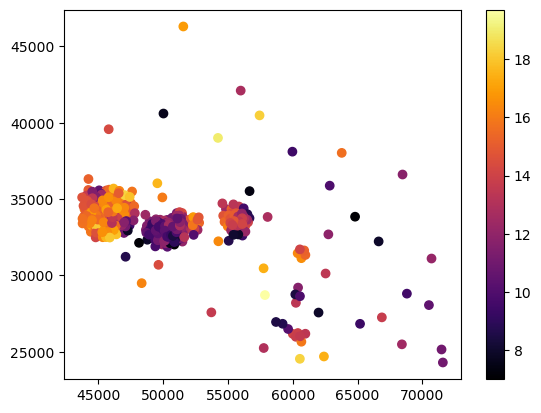

In [10]:
plt.scatter(point_dataset.x, point_dataset.y, c=point_dataset.z, cmap='inferno')
plt.colorbar()

In [22]:
len(np.array(map_1_dataset[['x']]).ravel())

1196495

In [94]:
len(pd.merge(map_1_dataset, map_3_dataset, how='inner', on=['x', 'y']))

1196463

In [30]:
set1 = set([np.array( point_dataset[['x']]).ravel(),
            np.array( point_dataset[['y']]).ravel()])

TypeError: unhashable type: 'numpy.ndarray'

### попытаюсь всетаки сделать что-нибудь с лесом

### Пробую простое одно дерево

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [248]:
X_train, X_test, y_train, y_test = train_test_split(Z_input, Y_input, random_state=12)
regressor = tree.DecisionTreeRegressor(random_state=0)

### создание массива признаков
### заполнение недостающих значений по среднему значению массива
### в том числе дополнение всех карт недостающими точками из финального грида

In [362]:
def reload_X():
    X = map_list[0]
    for i in range(1,5):
        X = X.merge(map_list[i], how='outer', on=['x', 'y'], suffixes = (i-1,i))
    X = X.merge(point_grid, how='outer', on=['x', 'y'], suffixes = ('4','y'))
    return(X)

In [366]:
X = map_list[0]
for i in range(1,5):
    X = X.merge(map_list[i], how='outer', on=['x', 'y'], suffixes = (i-1,i))
X = X.merge(point_grid, how='outer', on=['x', 'y'], suffixes = ('4','y'))
X

,x,y,z0,z1,z2,z3,z4,zy
0,68239.21,24467.0,0.15633,0.11137,40.34349,4142.3389,1.67671,NaN
1,68251.71,24467.0,0.15675,0.11094,40.47934,4139.9224,1.67665,NaN
2,68264.21,24467.0,0.15718,0.11095,40.69317,4138.2324,1.67664,NaN
3,68276.71,24467.0,0.15698,0.11070,40.84084,4138.5000,1.67664,NaN
4,68289.21,24467.0,0.15696,0.11088,41.04373,4138.9688,1.67669,NaN
...,...,...,...,...,...,...,...,...
1197207,53414.21,46892.0,NaN,NaN,NaN,NaN,NaN,NaN
1197208,53339.21,46917.0,NaN,NaN,NaN,NaN,NaN,NaN
1197209,53351.71,46917.0,NaN,NaN,NaN,NaN,NaN,NaN
1197210,53364.21,46917.0,NaN,NaN,NaN,NaN,NaN,NaN


In [346]:

# res['z1']=res['z1'].fillna(res['z1'].mean())
# res['z2'].mean()
# X = X.rename(columns={"z": "z4"})
for i in range(5):
    X[f'z{i}']=X[f'z{i}'].fillna(X[f'z{i}'].mean())

X
X_all_test = X[['z0','z1','z2','z3','z4']]
X_all_test


,z0,z1,z2,z3,z4
0,0.156330,0.111370,40.34349,4142.338900,1.676710
1,0.156750,0.110940,40.47934,4139.922400,1.676650
2,0.157180,0.110950,40.69317,4138.232400,1.676640
3,0.156980,0.110700,40.84084,4138.500000,1.676640
4,0.156960,0.110880,41.04373,4138.968800,1.676690
...,...,...,...,...,...
1197207,0.155732,0.123908,37.87300,4179.970106,1.677147
1197208,0.155732,0.123908,37.87300,4179.970106,1.677147
1197209,0.155732,0.123908,37.87300,4179.970106,1.677147
1197210,0.155732,0.123908,37.87300,4179.970106,1.677147


In [347]:
X
X_all_test = X.merge(control_data, how='right', on=['x', 'y'])
X_all_test = X_all_test[['z0','z1','z2','z3','z4']]
X_all_test
regressor = regressor.fit(Z_input,Y_input)
list_predict = regressor.predict(X_all_test)
list_predict
predictions = pd.DataFrame({'z': (list_predict)})
predictions = pd.concat([point_grid[['x','y']], predictions], axis = 1)
predictions
# print(type(list_predict))
control_data = import_dataset_from_file('..\\check_result\\Control_data.txt')
# Вот тут меняем путь к файлу результату команды
team_attempt_data = predictions
# результат попытки
attempt_value = calculate_norm(control_data=control_data, team_attempt_data=team_attempt_data)
print(attempt_value)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


1.8642099723012255


### Заполнение данных по интерполятору KNN (по ближайшему соседу)

In [335]:
i=0
for c in X.columns[2:-1]:
    print(c)
    #находим "нулевые" точки в map[i]
#     interp = NearestNDInterpolator(list(zip(map_list[i].x, map_list[i].y)), map_list[i].z)
    null_tmp = X[X[c].isnull()]
#     print(null_tmp)
    interp = NearestNDInterpolator(list(zip(map_list[i].x, map_list[i].y)), map_list[i].z)
    interpolated_df_tmp = pd.DataFrame({'x': null_tmp.x,'y': null_tmp.y,  c: interp(null_tmp.x,null_tmp.y)})
#     print(null_tmp.merge(interpolated_df_tmp, how='outer', on=['x', 'y']))
#     X.loc[X[c].isnull()][c] = interpolated_df_tmp['z']
#     print(null_tmp.merge( interpolated_df_tmp, on=['x','y',c], how = 'outer'))
#     print(df1.assign(revised_price=lambda x: x.price + x.price * 0.05))
#     X.loc[X[c].isnull(), c] = interpolated_df_tmp.reindex(X.loc[X[c].isnull(), c].index)
#     X[c] = X[c].mask(X[c] == 'Null')
    X[c].fillna(interpolated_df_tmp[c], inplace=True)
#     print(interpolated_df_tmp.merge(null_tmp[['x','y']],  how='outer', on=['x','y']))
#     i+=1
#     test=X.merge(interpolated_df_tmp, how='outer', on=['x', 'y'])
#     print(X)

# X/
# X_all_test = X[['z0','z1','z2','z3','z4']]
# X_all_test
    

z0
z1
z2
z3
z4


In [367]:
# Теперь проверим разное количество соседей
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.neighbors import KNeighborsRegressor
# f3_scorer = make_scorer(fbeta_score, beta=3)

# model = KNeighborsClassifier(weights='distance')
# parameters = {'weights':('uniform', 'distance'), 'n_neighbors' : [3,5,7,9]}
# # scorer = metrics.fbeta_score(beta = 3, average = "binary") # Выбираем f_beta с гамма 3 чтобы максимизировать ситуации, когда у нас все выбросы классифицируются как выбросы. Норма менее важна
# # scorer
# clf = GridSearchCV(model, parameters, scoring = f3_scorer, cv = 10)
# clf.fit(X_, y_co_np)
i=0
n_neighbors=5
for n_neighbors in [1,3,5,7,9,11]:
    X = map_list[0]
    for i in range(1,5):
        X = X.merge(map_list[i], how='outer', on=['x', 'y'], suffixes = (i-1,i))
    X = X.merge(point_grid, how='outer', on=['x', 'y'], suffixes = ('4','y'))
    for c in X.columns[2:-1]:
    #     print(c)
        null_tmp = X[X[c].isnull()]
        not_null_tmp = X[~X[c].isnull()]
    #     print(null_tmp.head())
    #     print(not_null_tmp.head())
        knn = KNeighborsRegressor(n_neighbors, weights='uniform')
        y_ = knn.fit(not_null_tmp[['x','y']], not_null_tmp[c]).predict(null_tmp[['x','y']])
    #     interp = model.fit(list(zip(map_list[i].x, map_list[i].y)), map_list[i].z)
        interpolated_df_tmp = pd.DataFrame({'x': null_tmp.x,'y': null_tmp.y,  c: y_})
        X[c].fillna(interpolated_df_tmp[c], inplace=True)
    X_all_test = X.merge(control_data, how='right', on=['x', 'y'])
    X_all_test = X_all_test[['z0','z1','z2','z3','z4']]
    X_all_test
    regressor = regressor.fit(Z_input,Y_input)
    list_predict = regressor.predict(X_all_test)
    list_predict
    predictions = pd.DataFrame({'z': (list_predict)})
    predictions = pd.concat([point_grid[['x','y']], predictions], axis = 1)
    predictions
    # print(type(list_predict))
    control_data = import_dataset_from_file('..\\check_result\\Control_data.txt')
    # Вот тут меняем путь к файлу результату команды
    team_attempt_data = predictions
    # результат попытки
    attempt_value = calculate_norm(control_data=control_data, team_attempt_data=team_attempt_data)
    print(n_neighbors, attempt_value)

# X/
# X_all_test = X[['z0','z1','z2','z3','z4']]
# X_all_test
    

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


1 1.8637355128622883


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


3 1.8637544647701043


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


5 1.8637496893266723


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


7 1.8637458220447727


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


9 1.8637421369826614


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


11 1.8637450295830873


### Видно что лучшие результаты с n = 9

### Из всех проверок интерполяции, видно лучший с KNN regressor 9

In [360]:
X
X_all_test = X.merge(control_data, how='right', on=['x', 'y'])
X_all_test = X_all_test[['z0','z1','z2','z3','z4']]
X_all_test
regressor = regressor.fit(Z_input,Y_input)
list_predict = regressor.predict(X_all_test)
list_predict
predictions = pd.DataFrame({'z': (list_predict)})
predictions = pd.concat([point_grid[['x','y']], predictions], axis = 1)
predictions
# print(type(list_predict))
control_data = import_dataset_from_file('..\\check_result\\Control_data.txt')
# Вот тут меняем путь к файлу результату команды
team_attempt_data = predictions
# результат попытки
attempt_value = calculate_norm(control_data=control_data, team_attempt_data=team_attempt_data)
print(attempt_value)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


1.8637496893266723


In [322]:
X_all_test = X.merge(control_data, how='right', on=['x', 'y'])[['z0','z1','z2','z3','z4']]

In [337]:
X_all_test = X.merge(control_data, how='right', on=['x', 'y'])
X_all_test = X_all_test[['z0','z1','z2','z3','z4']]

In [338]:
regressor = regressor.fit(Z_input,Y_input)
list_predict = regressor.predict(X_all_test)
list_predict

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([15.55629911, 15.55629911, 15.55629911, ..., 17.02326532,
        7.11995969,  7.11995969])

In [339]:
predictions = pd.DataFrame({'z': (list_predict)})
predictions = pd.concat([point_grid[['x','y']], predictions], axis = 1)
predictions
# print(type(list_predict))

,x,y,z
0,68239.21,24467.0,15.556299
1,68251.71,24467.0,15.556299
2,68264.21,24467.0,15.556299
3,68276.71,24467.0,15.556299
4,68289.21,24467.0,15.556299
...,...,...,...
1196585,53264.21,46942.0,15.045618
1196586,53276.71,46942.0,15.045618
1196587,53289.21,46942.0,17.023265
1196588,53301.71,46942.0,7.119960


In [340]:
control_data = import_dataset_from_file('..\\check_result\\Control_data.txt')
# Вот тут меняем путь к файлу результату команды
team_attempt_data = predictions
# результат попытки
attempt_value = calculate_norm(control_data=control_data, team_attempt_data=team_attempt_data)
print(attempt_value)

1.8660673783563737


### Попробую кросс-валидацию для KNN regressor на обучающей выборке 441 точки

In [392]:
import seaborn as sns

In [420]:
# создадим df из 441 точки, для прослеживания корреляции между map[i] и 441 точкой результирующей функции
print([('z', Z_maps[i]) for i in range(5)])
print([(f'z{i}', Z_maps[i])  for i in range(5)])
df = pd.DataFrame(columns = [f'z{i}' for i in range(5)],data =  np.array([Z_maps[i] for i in range(5)]).T)
df

[('z', array([0.17579, 0.14988, 0.17143, 0.13929, 0.14322, 0.15157, 0.1624 ,
       0.15058, 0.16793, 0.1527 , 0.15785, 0.18014, 0.17857, 0.18871,
       0.17934, 0.18067, 0.17696, 0.18411, 0.19026, 0.16248, 0.18458,
       0.18463, 0.1754 , 0.16146, 0.16208, 0.17943, 0.18835, 0.16307,
       0.16824, 0.16701, 0.18121, 0.16723, 0.15779, 0.17346, 0.16949,
       0.17508, 0.16739, 0.16345, 0.16094, 0.17902, 0.17217, 0.17028,
       0.17075, 0.17344, 0.16479, 0.17038, 0.17111, 0.17791, 0.15797,
       0.18025, 0.16962, 0.16317, 0.16611, 0.15229, 0.15108, 0.17386,
       0.18366, 0.18132, 0.16461, 0.17876, 0.17286, 0.17537, 0.18147,
       0.15297, 0.16091, 0.15705, 0.16829, 0.15664, 0.16359, 0.1458 ,
       0.16766, 0.15601, 0.17045, 0.15418, 0.1559 , 0.17276, 0.17862,
       0.15981, 0.16622, 0.16627, 0.16262, 0.17103, 0.13755, 0.18159,
       0.18376, 0.15035, 0.15305, 0.16538, 0.14896, 0.13616, 0.16193,
       0.14104, 0.13951, 0.14537, 0.18168, 0.161  , 0.1549 , 0.17137,
       0.1809

,z0,z1,z2,z3,z4
0,0.17579,0.12807,41.38491,4045.6523,1.68053
1,0.14988,0.11870,36.27350,4199.0898,1.67999
2,0.17143,0.13134,41.70690,4072.4370,1.68073
3,0.13929,0.13193,37.22216,4280.4648,1.68286
4,0.14322,0.11874,37.39187,4195.1157,1.67880
...,...,...,...,...,...
436,0.15552,0.12187,35.60380,4270.1318,1.67122
437,0.16269,0.13639,41.53450,4174.1216,1.67097
438,0.17806,0.11942,41.85337,4028.5405,1.67880
439,0.15289,0.11994,40.73364,4176.3394,1.68020


In [421]:
#добавляем значения в этих 441 точках
df['y']=Y_input
df

,z0,z1,z2,z3,z4,y
0,0.17579,0.12807,41.38491,4045.6523,1.68053,14.974396
1,0.14988,0.11870,36.27350,4199.0898,1.67999,14.078868
2,0.17143,0.13134,41.70690,4072.4370,1.68073,14.261570
3,0.13929,0.13193,37.22216,4280.4648,1.68286,15.347562
4,0.14322,0.11874,37.39187,4195.1157,1.67880,14.422570
...,...,...,...,...,...,...
436,0.15552,0.12187,35.60380,4270.1318,1.67122,9.374795
437,0.16269,0.13639,41.53450,4174.1216,1.67097,7.636603
438,0.17806,0.11942,41.85337,4028.5405,1.67880,14.622497
439,0.15289,0.11994,40.73364,4176.3394,1.68020,11.014532


<Axes: >

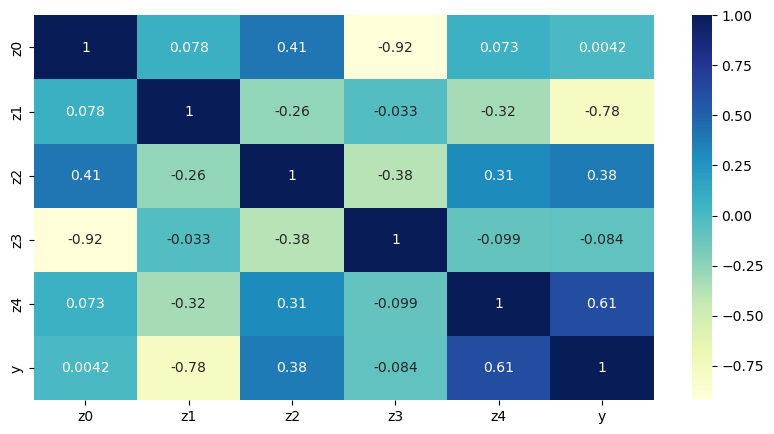

In [422]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
#видно что важнейшие карты - (по порядку) m1,m4,m2

In [423]:
m441 = df.drop(columns='y')

In [424]:
# для начала отнормирую веса карт map0,...,map4
reload_X()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['z0','z1','z2','z3','z4']])
m441 = scaler.transform(m441)
m441

array([[ 1.66761135,  0.37422345,  1.54474597, -2.08095699,  0.780678  ],
       [-0.48654202, -0.46824454, -0.70355474,  0.29621733,  0.65605547],
       [ 1.30512163,  0.66823309,  1.68637624, -1.66598737,  0.82683449],
       ...,
       [ 1.8563388 , -0.40350848,  1.75080242, -2.34606645,  0.38142435],
       [-0.23629109, -0.35675465,  1.25827887, -0.05624975,  0.70451979],
       [ 0.32989125,  0.2960007 , -0.5649947 , -0.06226405,  0.06294455]])

In [427]:
m441 = m441.T
tr_te_df = pd.DataFrame(columns = [f'z{i}' for i in range(5)],data =  np.array([m441[i] for i in range(5)]).T)
tr_te_df['x'], tr_te_df['y'] = point_dataset.x, point_dataset.y
tr_te_df.describe()

,z0,z1,z2,z3,z4,x,y
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,0.910077,0.147635,0.351255,-1.284157,0.102157,50357.196780,33285.933787
std,1.094081,0.922909,1.009935,1.286956,0.989860,5400.073545,2165.951284
min,-2.432014,-3.075669,-2.250509,-5.509379,-2.053331,43745.180000,24301.200000
25%,0.212664,-0.532981,-0.422630,-2.252349,-0.520935,45880.630000,32834.360000
50%,1.028266,0.080214,0.301084,-1.525728,-0.031676,49766.230000,33453.180000
75%,1.650983,0.885818,1.224792,-0.382340,0.619130,51970.160000,34184.690000
max,5.466271,2.207513,3.985846,3.504132,5.128620,71584.980000,46308.470000


In [443]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer,mean_squared_error

knn = KNeighborsRegressor(n_neighbors, weights='uniform')
parameters = {'weights': ['uniform','distance'],'n_neighbors' : [3,5,7,9,11]}
# у нас multioutput (так как по точкам (x,y) дается 5 предсказаний: (map0,map1,map2,map3,map4))
# mean_squared_error берет среднее по этим 5-ти предсказаниям
knnrgs = GridSearchCV(knn, parameters, scoring = 'neg_mean_squared_error', cv = 10)

# tr_te_df
# knnrgs.fit(tr_te_df[['x','y']], tr_te_df[['z0','z1','z2','z3','z4']])

knnrgs.fit(tr_te_df[:-50][['x','y']], tr_te_df[:-50][['z0','z1','z2','z3','z4']])


GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=11),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [444]:
knnrgs.cv_results_

{'mean_fit_time': array([0.00451465, 0.00511456, 0.00481696, 0.00405836, 0.0034555 ,
        0.00225232, 0.00376165, 0.00328367, 0.00380394, 0.00260508]),
 'std_fit_time': array([0.00192057, 0.00053812, 0.00065894, 0.00114853, 0.00109315,
        0.00092644, 0.00136026, 0.00134866, 0.00107178, 0.00091719]),
 'mean_score_time': array([0.00452685, 0.00631974, 0.0053942 , 0.00458298, 0.00308211,
        0.00260379, 0.00441921, 0.00289688, 0.00365007, 0.00328605]),
 'std_score_time': array([0.00215256, 0.00154629, 0.00092734, 0.00105385, 0.00100947,
        0.00083766, 0.00170511, 0.0011977 , 0.00164165, 0.00112351]),
 'param_n_neighbors': masked_array(data=[3, 3, 5, 5, 7, 7, 9, 9, 11, 11],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'dis

In [445]:
knnrgs.best_score_, knnrgs.best_estimator_, knnrgs.best_params_

(-0.4759084390116752,
 KNeighborsRegressor(n_neighbors=7, weights='distance'),
 {'n_neighbors': 7, 'weights': 'distance'})

### Таким образом лучший подбор значений обеспечивается KNN regressor n_neighbors=7, weights='distance'

In [437]:
(tr_te_df[['x','y']].shape, tr_te_df[['z0','z1','z2','z3','z4']].shape)

((441, 2), (441, 5))

In [385]:
# Перезагружаем наш X:
def reload_X(grid_ = 0):#maps добавлять ли точки которые есть в финальном гриде, но нет в maps
    global X
    X = map_list[0]
    for i in range(1,5):
        X = X.merge(map_list[i], how='outer', on=['x', 'y'], suffixes = (i-1,i))
    if grid_:
        X = X.merge(point_grid, how='outer', on=['x', 'y'], suffixes = ('4','y'))
    else :
        X=X.rename(columns={"z": "z4"})
reload_X()
X

,x,y,z0,z1,z2,z3,z4
0,68239.21,24467.0,0.15633,0.11137,40.34349,4142.3389,1.67671
1,68251.71,24467.0,0.15675,0.11094,40.47934,4139.9224,1.67665
2,68264.21,24467.0,0.15718,0.11095,40.69317,4138.2324,1.67664
3,68276.71,24467.0,0.15698,0.11070,40.84084,4138.5000,1.67664
4,68289.21,24467.0,0.15696,0.11088,41.04373,4138.9688,1.67669
...,...,...,...,...,...,...,...
1197133,50626.71,46892.0,NaN,NaN,38.80913,4019.4995,NaN
1197134,51901.71,46917.0,NaN,NaN,36.41907,4115.7212,NaN
1197135,53326.71,46917.0,NaN,NaN,40.62494,4028.9460,NaN
1197136,53176.71,46942.0,NaN,NaN,41.11232,4031.0015,NaN


In [391]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer,mean_squared_error

reload_X()
print(X)
X_points_not_filled = (X['z0'].isnull()) | (X['z1'].isnull()) | (X['z2'].isnull()) | (X['z3'].isnull()) | (X['z4'].isnull()) 
X_points_filled = ~X_points_not_filled
del not_filled_p, filled_p
not_filled_p = X[X_points_not_filled]
filled_p = X[X_points_filled]
(not_filled_p.head()), (filled_p.head())
X
knn = KNeighborsRegressor(n_neighbors, weights='uniform')
# y_ = knn.fit(filled_p[['x','y']], filled_p[[f'z{i}' for i in range(5)]]).predict(null_tmp[['x','y']])
parameters = {'weight': ['uniform','distance'],'n_neighbors' : [3,5,7,9,11]}
# у нас multioutput (так как по точкам (x,y) дается 5 предсказаний: (map0,map1,map2,map3,map4))
# mean_squared_error берет среднее по этим 5-ти предсказаниям
knnrgs = GridSearchCV(knn, parameters, scoring = mean_squared_error, cv = 10)
knnrgs.fit(not_null_tmp[['x','y']], not_null_tmp[c])

                x        y       z0       z1        z2         z3       z4
0        68239.21  24467.0  0.15633  0.11137  40.34349  4142.3389  1.67671
1        68251.71  24467.0  0.15675  0.11094  40.47934  4139.9224  1.67665
2        68264.21  24467.0  0.15718  0.11095  40.69317  4138.2324  1.67664
3        68276.71  24467.0  0.15698  0.11070  40.84084  4138.5000  1.67664
4        68289.21  24467.0  0.15696  0.11088  41.04373  4138.9688  1.67669
...           ...      ...      ...      ...       ...        ...      ...
1197133  50626.71  46892.0      NaN      NaN  38.80913  4019.4995      NaN
1197134  51901.71  46917.0      NaN      NaN  36.41907  4115.7212      NaN
1197135  53326.71  46917.0      NaN      NaN  40.62494  4028.9460      NaN
1197136  53176.71  46942.0      NaN      NaN  41.11232  4031.0015      NaN
1197137  53301.71  46942.0      NaN      NaN  40.94653  4014.9512      NaN

[1197138 rows x 7 columns]


(              x        y       z0       z1  z2  z3       z4
 4125   58201.71  24642.0  0.18432  0.09982 NaN NaN  1.67867
 4981   58201.71  24667.0  0.18498  0.10080 NaN NaN  1.67869
 11849  58176.71  24867.0  0.18792  0.10757 NaN NaN  1.67963
 12712  58176.71  24892.0  0.18712  0.10827 NaN NaN  1.67984
 13576  58176.71  24917.0  0.18513  0.10901 NaN NaN  1.68001,
           x        y       z0       z1        z2         z3       z4
 0  68239.21  24467.0  0.15633  0.11137  40.34349  4142.3389  1.67671
 1  68251.71  24467.0  0.15675  0.11094  40.47934  4139.9224  1.67665
 2  68264.21  24467.0  0.15718  0.11095  40.69317  4138.2324  1.67664
 3  68276.71  24467.0  0.15698  0.11070  40.84084  4138.5000  1.67664
 4  68289.21  24467.0  0.15696  0.11088  41.04373  4138.9688  1.67669)


### Теперь попробуем рандомный лес